In [5]:
import random, numpy, math, copy, matplotlib.pyplot as plt

Exception ignored in: <function LocalSolver.__del__ at 0x7f95d3d6cef0>
Traceback (most recent call last):
  File "/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/localsolver/__init__.py", line 2881, in __del__
    self.delete()
  File "/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/localsolver/__init__.py", line 2890, in delete
    if self._solver_ptr != None:
AttributeError: _solver_ptr
Exception ignored in: <function LocalSolver.__del__ at 0x7f95d3d6cef0>
Traceback (most recent call last):
  File "/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/localsolver/__init__.py", line 2881, in __del__
    self.delete()
  File "/Users/eshanchatty/opt/anaconda3/lib/python3.7/site-packages/localsolver/__init__.py", line 2890, in delete
    if self._solver_ptr != None:
AttributeError: _solver_ptr


In [6]:
cities = [random.sample(range(100), 2) for x in range(15)];

Here we have to make a list of “cities”, which are just a list of two coordinates, are integers chosen randomly from 0 to 100.

Range(100) returns the list [0,1,2,...,100]. Then random.sample( ,2) randomly chooses a pair from the list. This ensures that any city doesnt have the same coordinates.  This last piece repeats the random sampling 15 times and makes a list of these pairs of coordinates, which I called cities.

In [8]:
tour = random.sample(range(15),15);


A “tour” will be a list of 15 numbers indicating the order in which we will be visiting the cities. We need a closed loop, so that the last city will be directly connected to the first. Here we just choose a random order to start off with. By asking for a random sample of 15 numbers from a list of 15 elements, we get a shuffled list created for us in one line.

In [9]:
for log in numpy.logspace(0,5,num=100000)[::-1]:
       [i,j] = sorted(random.sample(range(15),2));
       newTour =  tour[:i] + tour[j:j+1] +  tour[i+1:j] + tour[i:i+1] + tour[j+1:];
       if math.exp( ( sum([ math.sqrt(sum([(cities[tour[(k+1) % 15]][d] - cities[tour[k % 15]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]]) - sum([math.sqrt(sum([(cities[newTour[(k+1) % 15]][d] - cities[newTour[k % 15]][d])**2 for d in [0,1] ])) for k in [j,j-1,i,i-1]])) / log) > random.random():
           tour = copy.copy(newTour);

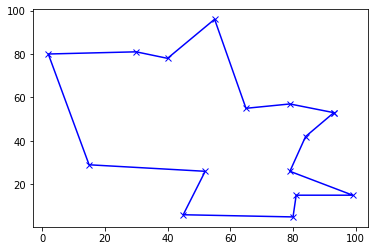

In [10]:
plt.plot([cities[tour[i % 15]][0] for i in range(16)], [cities[tour[i % 15]][1] for i in range(16)], 'xb-');
plt.show()

the Python module matplotlib plots the cities and connects them according to our best guess tour.The pictures are nice, and for a small number of cities, fairly convincing to the eye that it’s at least a pretty good route. That is, the algorithm did something! Considering that we used 10^5 loop iterations and a brute force solution of searching over all possible 15!-10^12 tours would take much longer (though would be guaranteed to be optimal).